In [ ]:
from pandas_datareader import data
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
df= data.DataReader('XOM', 'yahoo', start='2010/01/01', end='2020/01/01')
df=df.resample('D').pad()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,69.260002,68.190002,68.720001,69.150002,27809100.0,45.575386
2010-01-05,69.449997,68.800003,69.190002,69.419998,30174700.0,45.753330
2010-01-06,70.599998,69.339996,69.449997,70.019997,35044700.0,46.148773
2010-01-07,70.059998,69.419998,69.900002,69.800003,27192100.0,46.003792
2010-01-08,69.750000,69.220001,69.690002,69.519997,24891800.0,45.819229


In [ ]:
#Sliding Window
df['previous_Adj_close'] = df['Adj Close'].shift(-1)
df= df.dropna()
df.head(10)


,High,Low,Open,Close,Volume,Adj Close,previous_Adj_close
Date,,,,,,,
2010-01-04,69.260002,68.190002,68.720001,69.150002,27809100.0,45.575386,45.753330
2010-01-05,69.449997,68.800003,69.190002,69.419998,30174700.0,45.753330,46.148773
2010-01-06,70.599998,69.339996,69.449997,70.019997,35044700.0,46.148773,46.003792
2010-01-07,70.059998,69.419998,69.900002,69.800003,27192100.0,46.003792,45.819229
2010-01-08,69.750000,69.220001,69.690002,69.519997,24891800.0,45.819229,45.819229
2010-01-09,69.750000,69.220001,69.690002,69.519997,24891800.0,45.819229,45.819229
2010-01-10,69.750000,69.220001,69.690002,69.519997,24891800.0,45.819229,46.333324
2010-01-11,70.519997,69.650002,69.940002,70.300003,30685000.0,46.333324,46.102650
2010-01-12,69.989998,69.519997,69.720001,69.949997,31496700.0,46.102650,45.918106


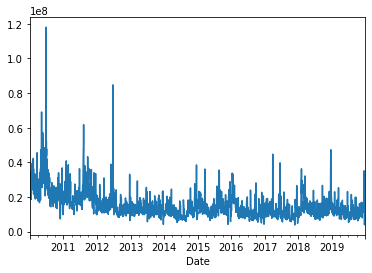

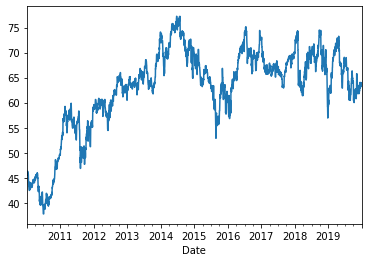

In [ ]:
df['Volume'].plot()
plt.show()
df['Adj Close'].plot()
plt.show()

In [ ]:
#train = df['2010':'2017']
#train= train.dropna()
#train.head()

In [ ]:
#test = df['2018':]
#test.head()

In [ ]:
#train.reset_index(inplace=True)
#train

In [ ]:
#test.reset_index(inplace=True)
#test


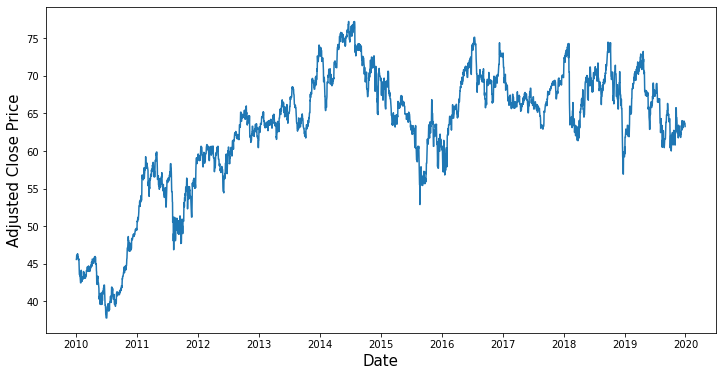

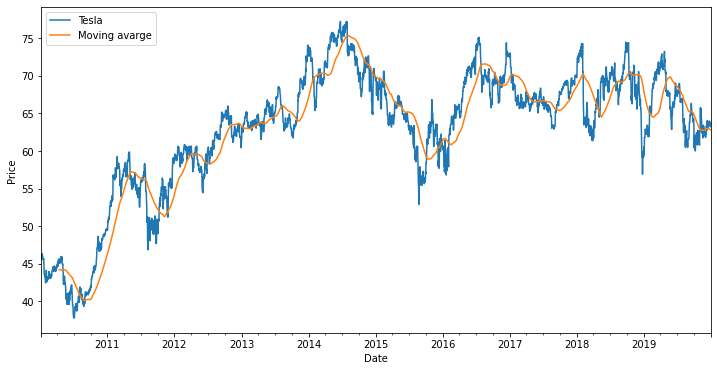

In [ ]:
# Visualize the training stock data:

plt.figure(figsize = (12,6))
plt.plot(df["Adj Close"])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price',fontsize=15)
plt.show()


# Rolling mean
close_sp = df['Adj Close']
mavg = close_sp.rolling(window=100).mean()

plt.figure(figsize = (12,6))
close_sp.plot(label='Tesla')
mavg.plot(label='Moving avarge')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [ ]:
df.reset_index(inplace=True)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,previous_Adj_close
0,2010-01-04,69.260002,68.190002,68.720001,69.150002,27809100.0,45.575386,45.753330
1,2010-01-05,69.449997,68.800003,69.190002,69.419998,30174700.0,45.753330,46.148773
2,2010-01-06,70.599998,69.339996,69.449997,70.019997,35044700.0,46.148773,46.003792
3,2010-01-07,70.059998,69.419998,69.900002,69.800003,27192100.0,46.003792,45.819229
4,2010-01-08,69.750000,69.220001,69.690002,69.519997,24891800.0,45.819229,45.819229


In [ ]:
X=df.iloc[:,1:7].values # Adj close
y=df.iloc[:,7:8].values # Previous


In [ ]:
X

array([[6.92600021e+01, 6.81900024e+01, 6.87200012e+01, 6.91500015e+01,
        2.78091000e+07, 4.55753860e+01],
       [6.94499969e+01, 6.88000031e+01, 6.91900024e+01, 6.94199982e+01,
        3.01747000e+07, 4.57533302e+01],
       [7.05999985e+01, 6.93399963e+01, 6.94499969e+01, 7.00199966e+01,
        3.50447000e+07, 4.61487732e+01],
       ...,
       [7.03099976e+01, 6.98799973e+01, 7.01999969e+01, 6.98899994e+01,
        1.05161000e+07, 6.36404228e+01],
       [7.03099976e+01, 6.98799973e+01, 7.01999969e+01, 6.98899994e+01,
        1.05161000e+07, 6.36404228e+01],
       [7.04400024e+01, 6.94000015e+01, 7.00899963e+01, 6.94800034e+01,
        1.26894000e+07, 6.32671013e+01]])

In [ ]:
y

array([[45.75333023],
       [46.14877319],
       [46.00379181],
       ...,
       [63.64042282],
       [63.26710129],
       [63.54027176]])

In [ ]:
#Grid search
rfr=RandomForestRegressor(random_state=0)
param_grid = { 
    'n_estimators': [100,200,500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}
CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
CV_rfc.best_params_

{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = RandomForestRegressor(n_estimators=100, random_state=0, max_features='auto', max_depth=6)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([64.57743905, 57.19343154, 65.02680455, 68.55638038, 69.7663752 ,
       69.05624015, 56.49359327, 70.25168883, 62.0479146 , 44.51481859,
       52.96687235, 72.17395852, 54.09590555, 65.71115851, 56.63172197,
       65.18771909, 71.12500118, 58.02553093, 70.25168883, 63.05278782,
       60.39676355, 73.7597894 , 39.99655738, 67.1862954 , 69.38925583,
       62.21365324, 73.78985341, 69.66139237, 39.20066138, 69.86539391,
       55.94053653, 73.72284211, 60.02534952, 64.58603533, 55.75324169,
       44.79140684, 65.03207563, 66.12320958, 63.02720961, 69.94077932,
       55.94053653, 67.33292219, 44.75326464, 63.12270525, 63.06255991,
       71.3193475 , 49.76069654, 61.36175525, 49.60259081, 58.98094338,
       73.78561418, 55.77292637, 66.98651597, 67.33292219, 62.12820097,
       67.1723958 , 43.8255169 , 53.92962658, 59.91501179, 63.28515451,
       63.21951192, 62.96724392, 64.58156448, 57.16901363, 65.95481111,
       67.08749763, 65.40610032, 47.3837791 , 69.23292145, 59.95

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4316276385492792
Mean Squared Error: 0.41359145482269727
Root Mean Squared Error: 0.6431107640388997


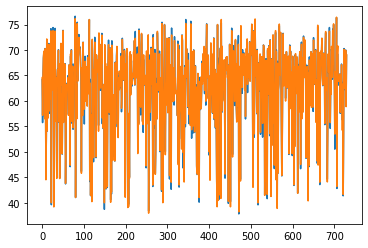

In [ ]:
plt.plot(y_test) #Blue
plt.plot(y_pred) #Orange
plt.show()